In [226]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
%matplotlib inline
from numpy.linalg import eig

In [227]:
L = 2 * np.pi
N = 100
x = np.linspace(0,L,N)
dx = x[1] - x[0]
k = [np.ones(N-1),-np.ones(N-1)]
offset = [1,-1]
D = diags(k,offset).toarray()
D = D/(2 * dx)

In [228]:
k1 = [np.ones(N-1),-2*np.ones(N),np.ones(N-1)]
offset = [-1,0,1]
Lap = diags(k1,offset).toarray()
Lap = Lap/(dx ** 2)

In [229]:
def f(x):
    return np.sin(x)

y = f(x)

In [230]:
D[0,0] = 0
D[0,1] = 0
D[1,0] = 0
D[N-1,N-2] = 0
D[N-2,N-1] = 0
D[N-1,N-1] = 0

In [231]:
Lap[0,0] = 0
Lap[0,1] = 0
Lap[1,0] = 0
Lap[N-1,N-2] = 0
Lap[N-2,N-1] = 0
Lap[N-1,N-1] = 0

In [232]:
df = np.dot(D,y)
Lapf = np.dot(Lap,y)

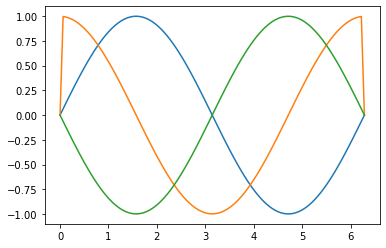

In [233]:
plt.plot(x, y)
plt.plot(x, df)
plt.plot(x, Lapf)

In [234]:
hbar = 1
m =1
H = -(1/2)*((hbar ** 2)/m) * Lap

In [235]:
E,V = eig(H)

In [236]:
V[1,0]

0.004509612100194916

In [237]:
V[2]

array([-0.00901468,  0.01799307, -0.026899  ,  0.00901468,  0.01799307,
        0.026899  ,  0.03569662, -0.0443505 ,  0.0528258 ,  0.06108839,
        0.06910499, -0.03569662, -0.0443505 ,  0.0528258 ,  0.06108839,
       -0.08427226, -0.09808356,  0.10441032, -0.11031665, -0.11577878,
       -0.12077471, -0.06910499,  0.12528433,  0.08427226,  0.09808356,
        0.10441032, -0.14197282, -0.14211592,  0.13109773, -0.13431657,
        0.13699456, -0.12735101, -0.12309149,  0.11031665, -0.14125805,
        0.11577878, -0.11833633,  0.12077471, -0.11310466, -0.12528433,
        0.12309149, -0.12735101, -0.11833633, -0.13109773,  0.09477042,
       -0.08786129, -0.11310466,  0.13431657, -0.08786129,  0.09477042,
       -0.08059838, -0.08059838,  0.13699456, -0.07301093,  0.14125805,
        0.07301093,  0.06512948, -0.06512948,  0.14211592,  0.14197282,
       -0.01351068, -0.00450961, -0.00450961, -0.02245734, -0.13812728,
       -0.01351068,  0.13812728,  0.13997448, -0.05698578, -0.02

In [238]:
v0 = V[:,0].reshape(100,1)
v1 = V[:,1].reshape(100,1)

In [239]:
evalue = []
evalue1 = []
evalue2 = []
for values in range(len(E)):
    evalue.append(V[values,0])
    evalue1.append(V[values,1])
    evalue2.append(V[values,2])

In [240]:
def wavefn(n,x,a = 1):
    return (np.sqrt(2/a) * np.sin((n * np.pi * x)/a))

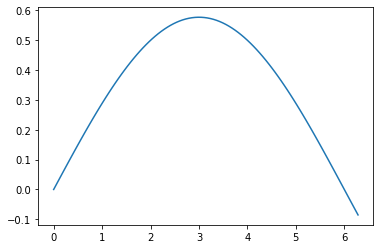

In [269]:
# plt.plot(x,v0)
plt.plot(x, wavefn(1,x,6))
# plt.plot(x,(evalue1))
# plt.plot(x,evalue2)
plt.show()

[-0.        0.        0.12499   0.499832  1.124151  1.997316]


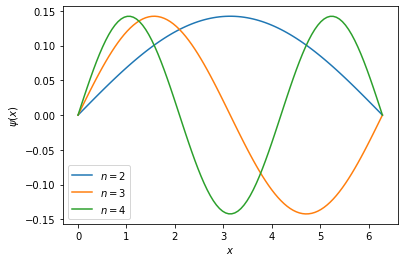

In [268]:
vals, vecs = eigsh(H, which='SM')

print(np.round(vals, 6))

for k in range(2,5):
    vec = vecs[:, k]
    mag = np.sqrt(np.dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    plt.plot(x, vec, label=r"$n=%i$"%k)

plt.xlabel(r"$x$")
plt.ylabel(r"$\psi(x)$")
# plt.savefig("eigenvectors.png", dpi=600)
plt.legend()    
plt.show()